# 第2章 スカラー移流方程式（数値計算法の基礎）

# 2.6 輸送速度が未知量からなる非線形問題

## Burgers方程式の基本的解法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dt = 0.05
dx = 0.1

jmax = 21
nmax = 10

In [3]:
def init(q1, q2, dx, jmax):
    xs = -1.0 # 始点
    x = np.linspace(xs, xs + dx * (jmax-1), jmax)
    q = np.array([(float(q1) if i < 0.0 else float(q2)) for i in x])
    return (x, q)

In [4]:
def do_computing(x, q, dt, dx, nmax, ff, order = 1, interval = 2):
    plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
    plt.rcParams["font.size"] = 22 # グラフの文字サイズ
    
    # 初期分布の可視化
    plt.plot(x, q, marker='o', lw=2, label='n=0') 
    
    for n in range(1, nmax + 1):
        qold = q.copy()
        for j in range(order, jmax - order):
            ff1 = ff(qold, qold[j], dt, dx, j)
            ff2 = ff(qold, qold[j], dt, dx, j-1)
            q[j] = qold[j] - dt / dx * (ff1 - ff2)

        # 各ステップの可視化
        if n % interval == 0:
            plt.plot(x, q, marker='o', lw=2, label=f'n={n}')

    # グラフの後処理
    plt.grid(color='black', linestyle='dashed', linewidth=0.5)
    plt.xlabel('x')
    plt.ylabel('q')
    plt.legend()
    plt.show()

### うまくいかない場合

1次精度風上差分法

In [5]:
def UPWIND1(q, c, dt, dx, j):
    ur = q[j + 1]
    ul = q[j]
    fr = c * ur
    fl = c * ul
    return 0.5 * (fr + fl - abs(c) * (ur - ul))

In [6]:
q1 = 1
q2 = 0
x, q = init(q1, q2, dx, jmax)

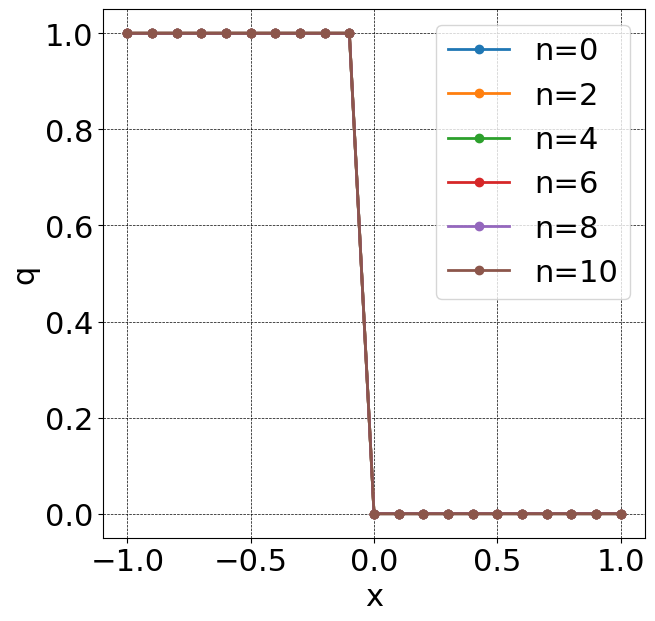

In [7]:
do_computing(x, q, dt, dx, nmax, UPWIND1)

## Murman-Cole法

In [8]:
def MC(q, c, dt, dx, j):
    ur = q[j + 1]
    ul = q[j]
    fr = 0.5 * ur**2
    fl = 0.5 * ul**2
    c = 0.5 * (ur + ul)
    return 0.5 * (fr + fl - np.sign(c) * (fr - fl))

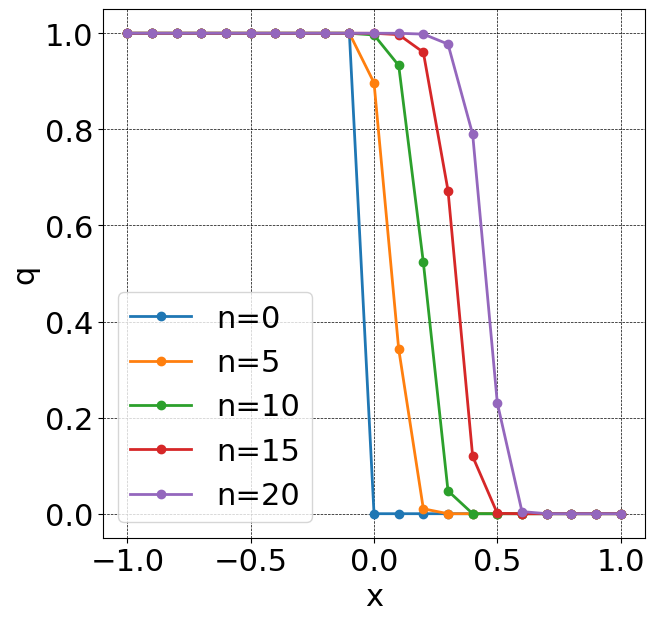

In [9]:
q1 = 1
q2 = 0
x, q = init(q1, q2, dx, jmax)

nmax = 20
do_computing(x, q, dt, dx, nmax, MC, interval = 5)

ケース1

In [10]:
q1 = 2
q2 = 1
x, q = init(q1, q2, dx, jmax)

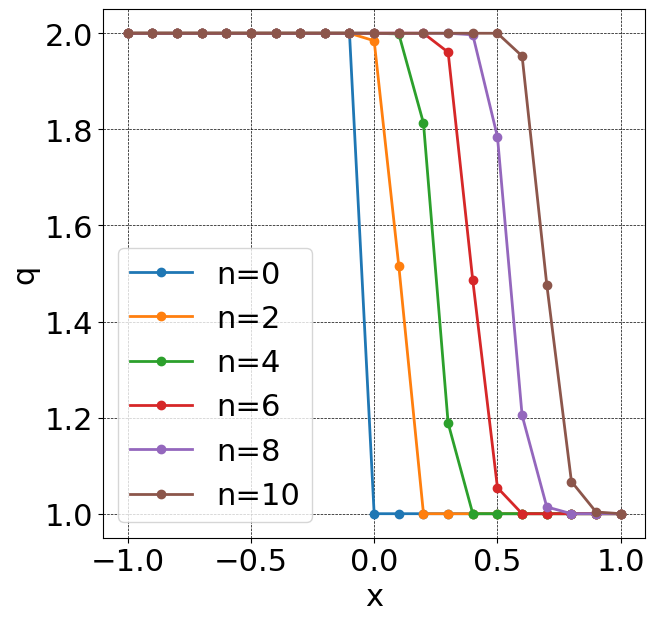

In [11]:
nmax = 10
do_computing(x, q, dt, dx, nmax, MC)

ケース2

In [12]:
q1 = 1
q2 = 2
x, q = init(q1, q2, dx, jmax)

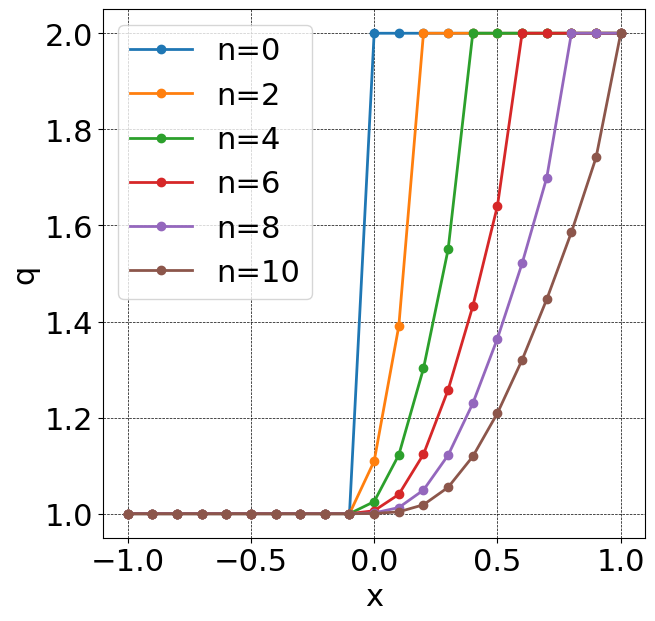

In [13]:
nmax = 10
do_computing(x, q, dt, dx, nmax, MC)

ケース3

In [14]:
q1 = 1
q2 = -1
x, q = init(q1, q2, dx, jmax)

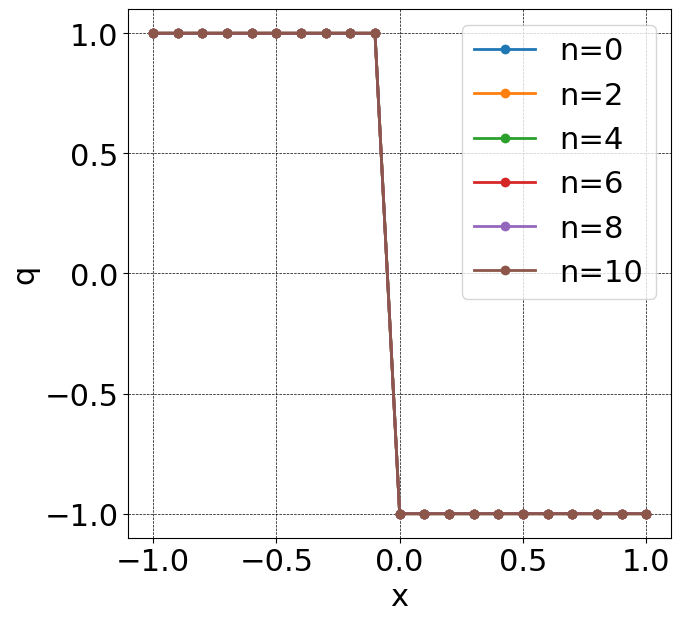

In [15]:
nmax = 10
do_computing(x, q, dt, dx, nmax, MC)

ケース4

In [16]:
q1 = -1
q2 = 1
x, q = init(q1, q2, dx, jmax)

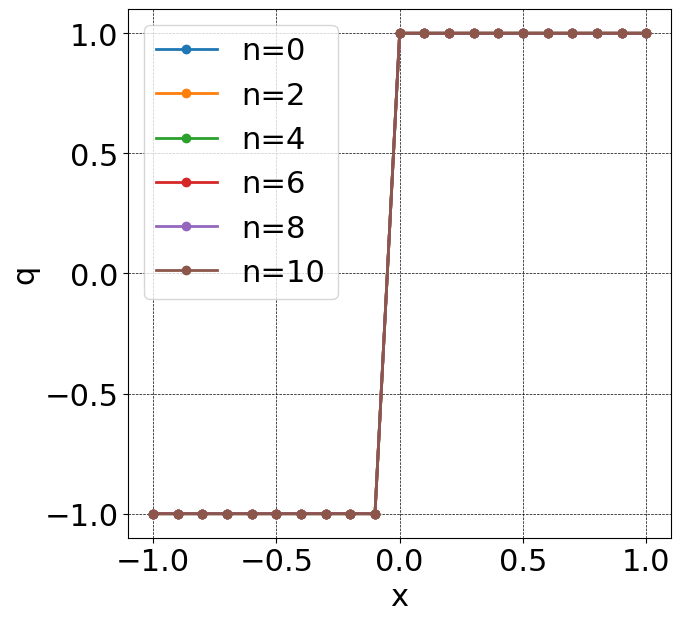

In [17]:
nmax = 10
do_computing(x, q, dt, dx, nmax, MC)

### Godunov法
どちらの実装を使っても同じ結果が得られる。どちらかの実装のセルを実行後、下のケースを実行してみよう。

(1) 分岐を利用した記述法

In [18]:
def GODUNOV(q, c, dt, dx, j):
    ur = q[j + 1]
    ul = q[j]
    fr = 0.5 * ur**2
    fl = 0.5 * ul**2
    c = 0.5 * (ur + ul)
    
    if q[j] <= 0 and q[j+1] <= 0:
        return fr        
    elif q[j] >= 0 and q[j+1] >= 0:
        return fl
    elif q[j] > 0 > q[j+1]:
        if c < 0:
            return fr
        else:
            return fl
    else:
        return 0

(2) 分岐を記述しない記述法

In [21]:
def GODUNOV(q, c, dt, dx, j):
    qm = 0.5 * (q[j] + np.abs(q[j]))
    qp = 0.5 * (q[j+1] - np.abs(q[j+1]))
    return np.max([0.5 * qm ** 2, 0.5 * qp ** 2])

ケース1

In [19]:
q1 = 2
q2 = 1
x, q = init(q1, q2, dx, jmax)

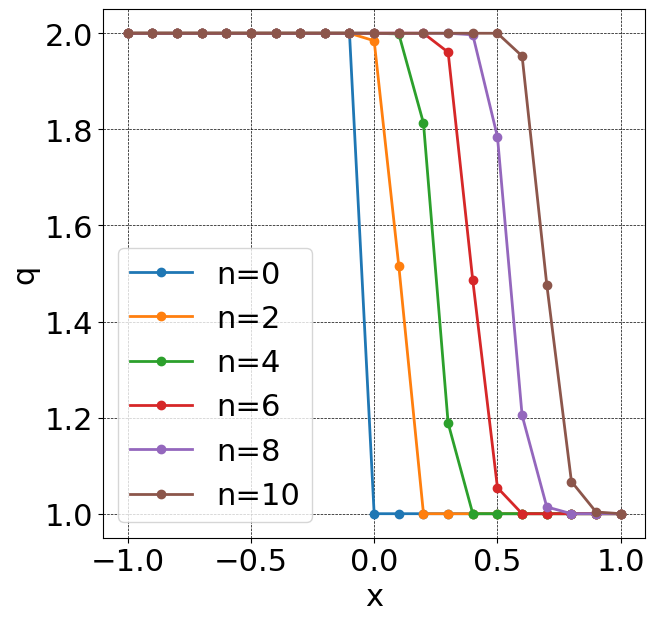

In [20]:
nmax = 10
do_computing(x, q, dt, dx, nmax, GODUNOV)

ケース2

In [22]:
q1 = 1
q2 = 2
x, q = init(q1, q2, dx, jmax)

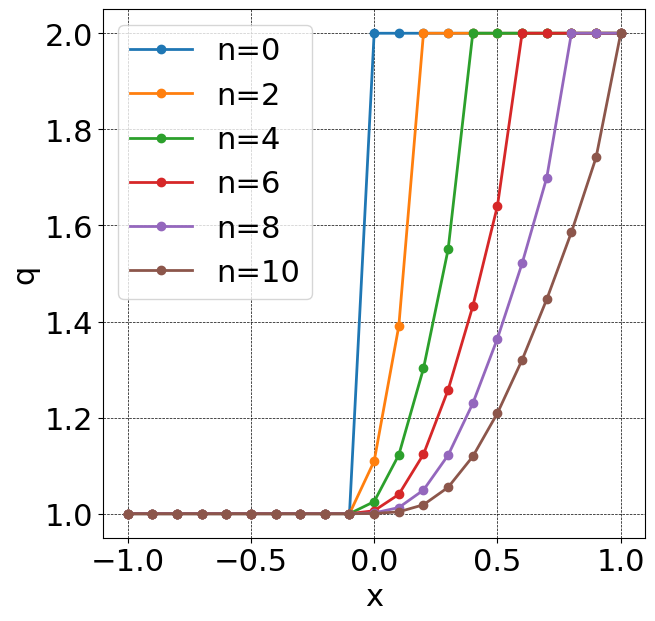

In [23]:
nmax = 10
do_computing(x, q, dt, dx, nmax, GODUNOV)

ケース3

In [24]:
q1 = 1
q2 = -1
x, q = init(q1, q2, dx, jmax)

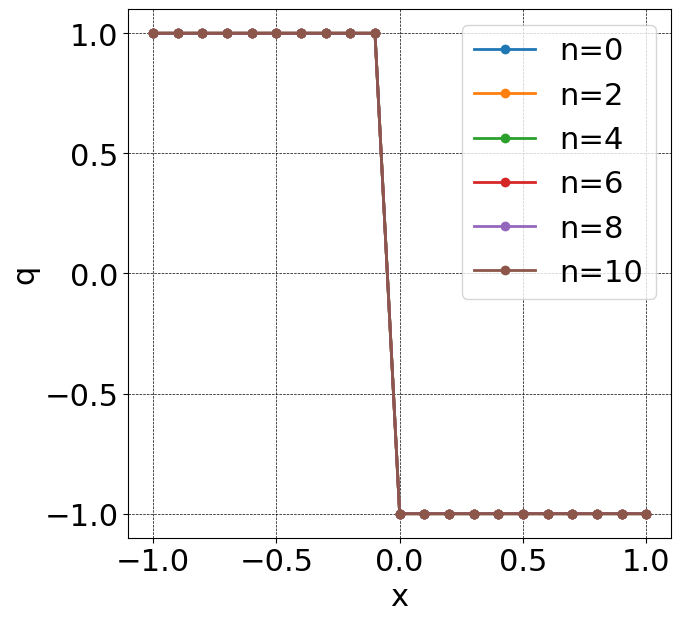

In [25]:
nmax = 10
do_computing(x, q, dt, dx, nmax, GODUNOV)

ケース4

In [26]:
q1 = -1
q2 = 1
x, q = init(q1, q2, dx, jmax)

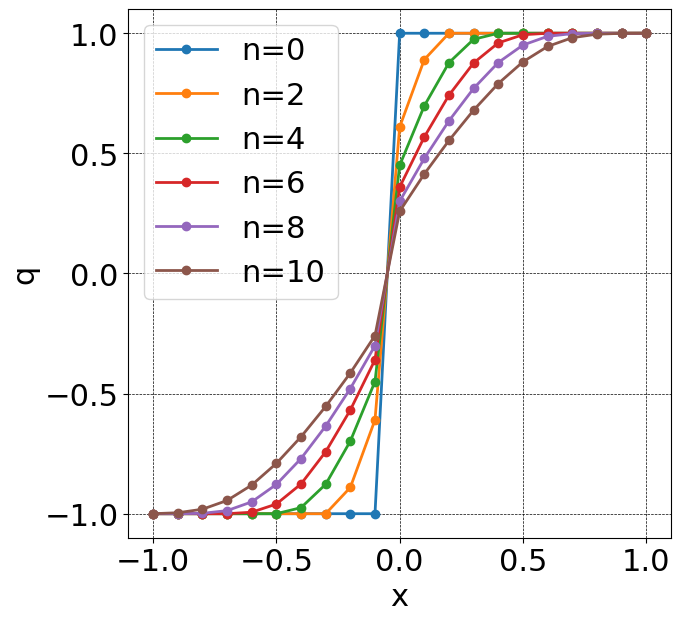

In [27]:
nmax = 10
do_computing(x, q, dt, dx, nmax, GODUNOV)